In [1]:
import numpy as np
import pandas as pd
import re,math
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator


plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 


data = pd.read_excel(r'苏州１５－２０年经济与碳排放数据.xlsx')

In [2]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207


In [3]:
data

,年份,碳排放总量（亿吨）,碳排放增速（％）,ＧＤＰ（万亿元）,ＧＤＰ增速（％）,单位地区生产总值二氧化碳排放量
0,2015,1.60,缺失,1.45,缺失,1.1034
1,2016,1.70,6.25,1.55,6.9,1.0968
2,2017,1.90,11.8,1.73,11.61,1.0983
3,2018,2.06,8.42,1.85,6.94,1.1135
4,2019,2.07,0.49,1.92,3.78,1.0781
5,2020,2.02,2.42,2.02,5.2,1.0000


In [4]:
data = data.set_index("年份")

In [5]:
data

,碳排放总量（亿吨）,碳排放增速（％）,ＧＤＰ（万亿元）,ＧＤＰ增速（％）,单位地区生产总值二氧化碳排放量
年份,,,,,
2015,1.60,缺失,1.45,缺失,1.1034
2016,1.70,6.25,1.55,6.9,1.0968
2017,1.90,11.8,1.73,11.61,1.0983
2018,2.06,8.42,1.85,6.94,1.1135
2019,2.07,0.49,1.92,3.78,1.0781
2020,2.02,2.42,2.02,5.2,1.0000


In [6]:
data = data.replace("缺失",0)
data[data==0]=np.nan #先将0值转化为空值\
df=data.dropna(axis=1,thresh=11, subset=None, inplace=False) #过滤空值过多的列
df1=df.fillna(value=None,method='ffill',axis=0,limit=None) #列向前填充
df2=df.fillna(value=None,method='bfill',axis=0,limit=None) #列向后填充，避免首行空值
data

,碳排放总量（亿吨）,碳排放增速（％）,ＧＤＰ（万亿元）,ＧＤＰ增速（％）,单位地区生产总值二氧化碳排放量
年份,,,,,
2015,1.60,NaN,1.45,NaN,1.1034
2016,1.70,6.25,1.55,6.90,1.0968
2017,1.90,11.80,1.73,11.61,1.0983
2018,2.06,8.42,1.85,6.94,1.1135
2019,2.07,0.49,1.92,3.78,1.0781
2020,2.02,2.42,2.02,5.20,1.0000


In [7]:
x = np.array(data.index)
y1 = np.array(data["碳排放总量（亿吨）"])
y2 = np.array(data["碳排放增速（％）"])
y3 = np.array(data["ＧＤＰ（万亿元）"])
y4 = np.array(data["ＧＤＰ增速（％）"])
y5 = np.array(data["单位地区生产总值二氧化碳排放量"])

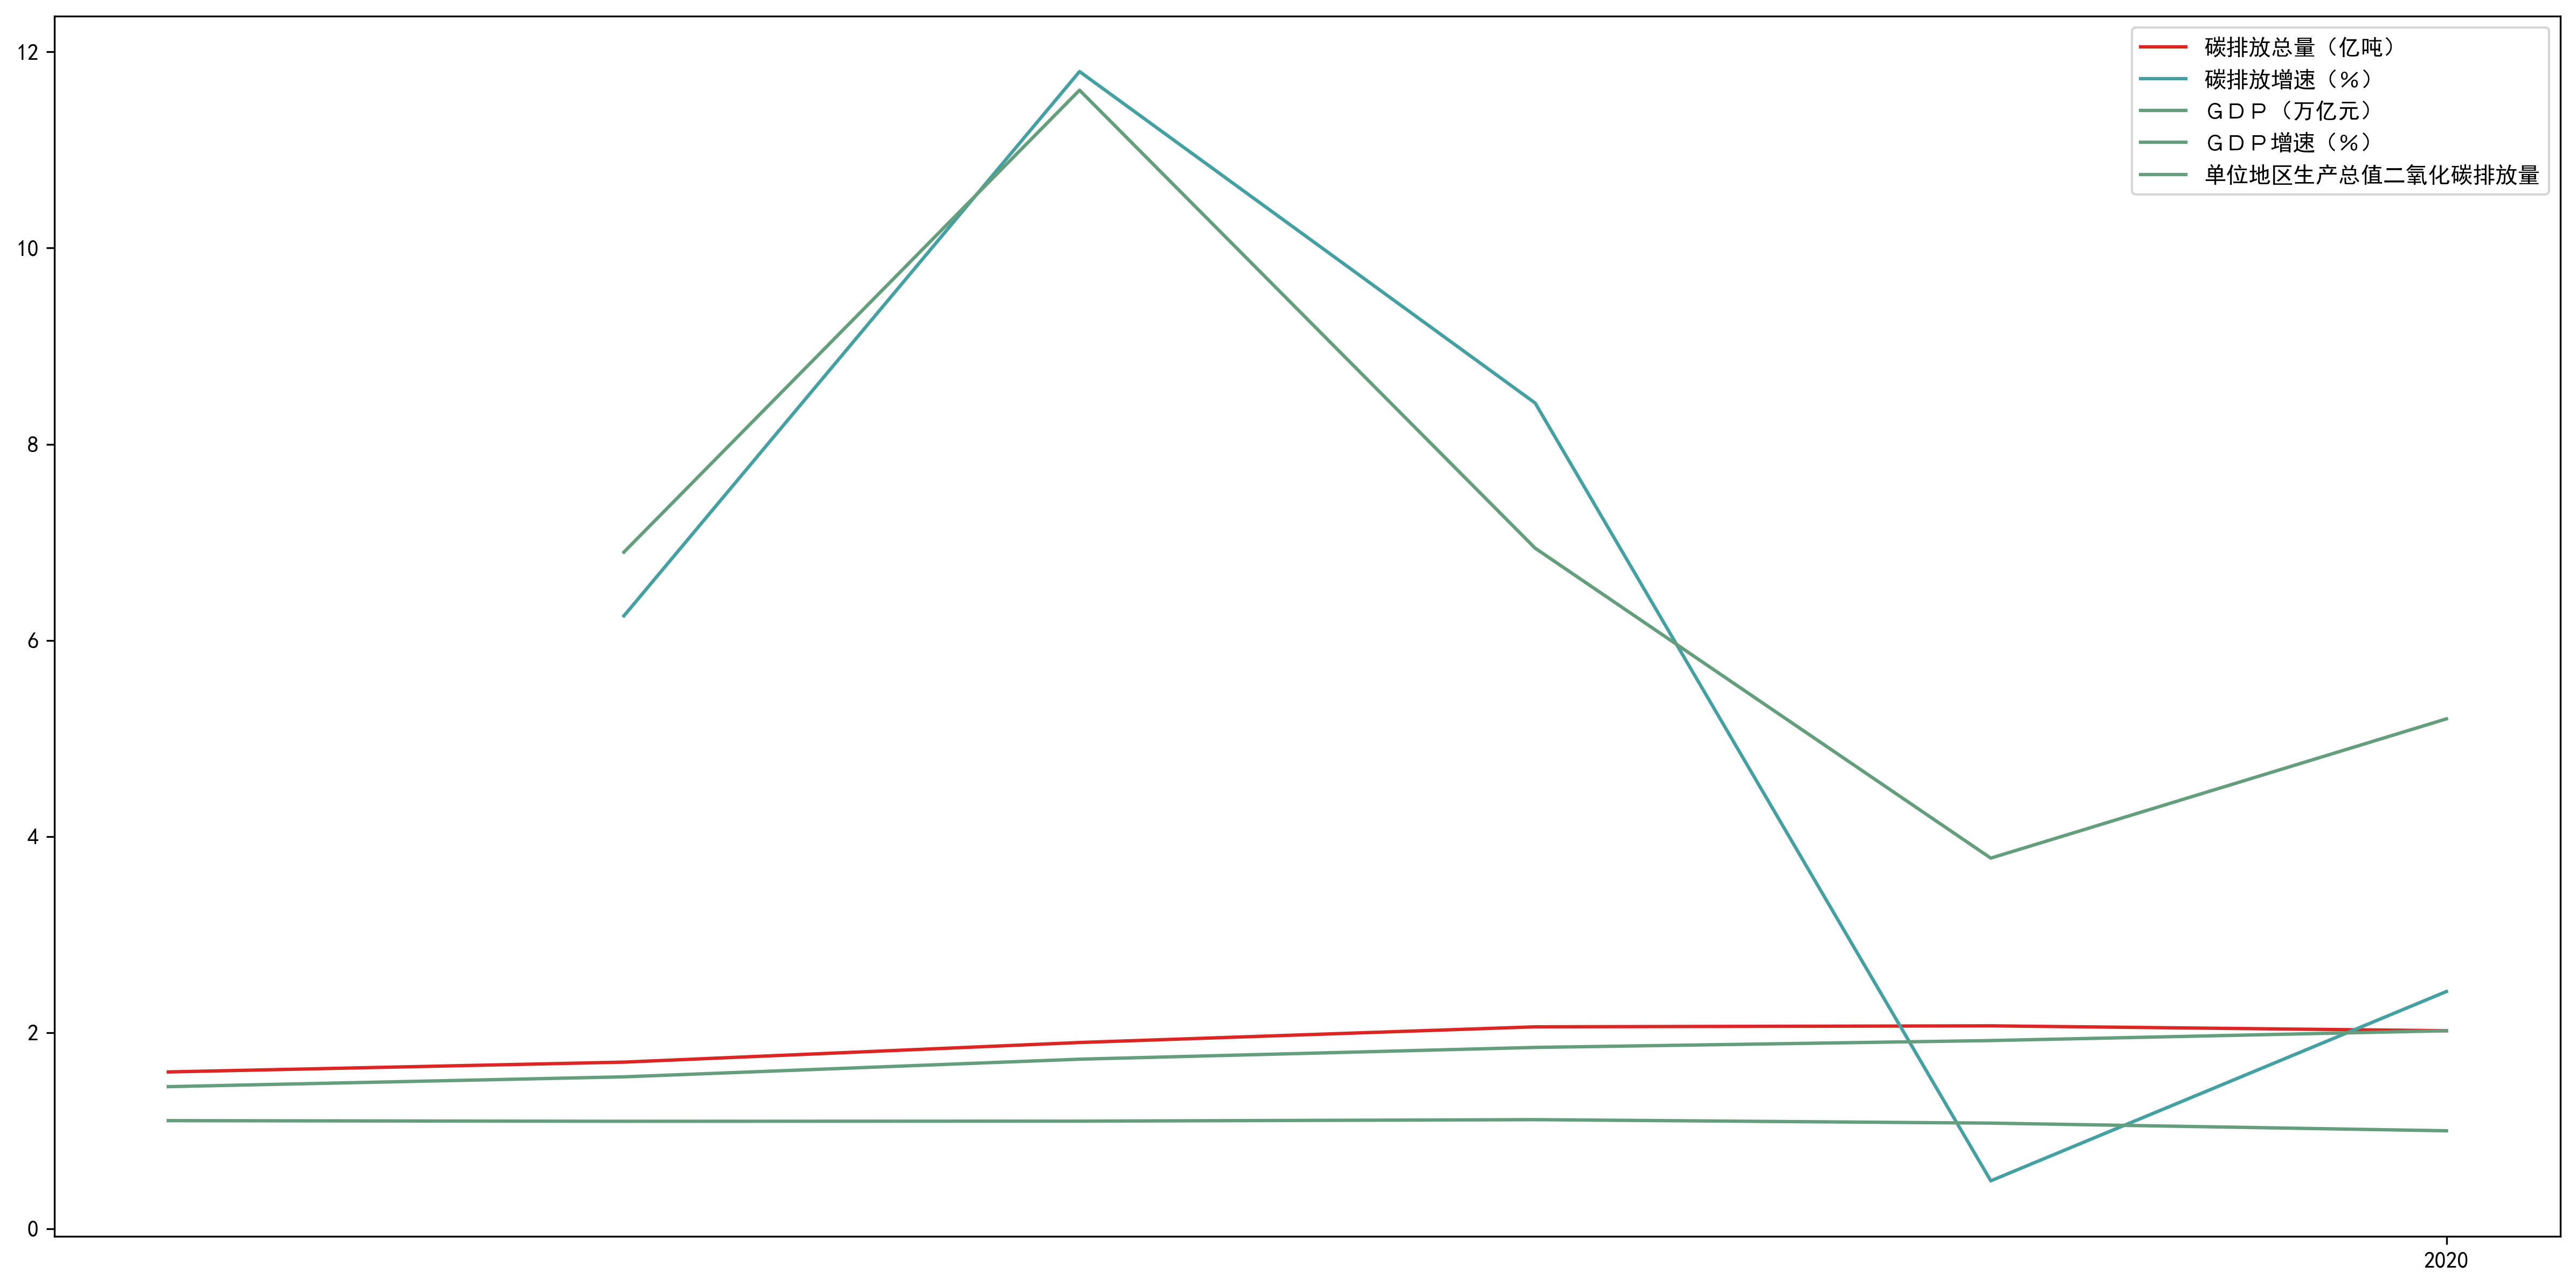

In [8]:
plt.figure(figsize=(20,10), dpi=300)
plt.plot(x,y1,color=r_hex,label='碳排放总量（亿吨）')
plt.plot(x,y2,color=tl_hex,label='碳排放增速（％）')
plt.plot(x,y3,color=g_hex,label='ＧＤＰ（万亿元）')
plt.plot(x,y4,color=g_hex,label='ＧＤＰ增速（％）')
plt.plot(x,y5,color=g_hex,label='单位地区生产总值二氧化碳排放量')
x_major_locator = MultipleLocator(20)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.legend(loc=0,frameon=True)
plt.show()

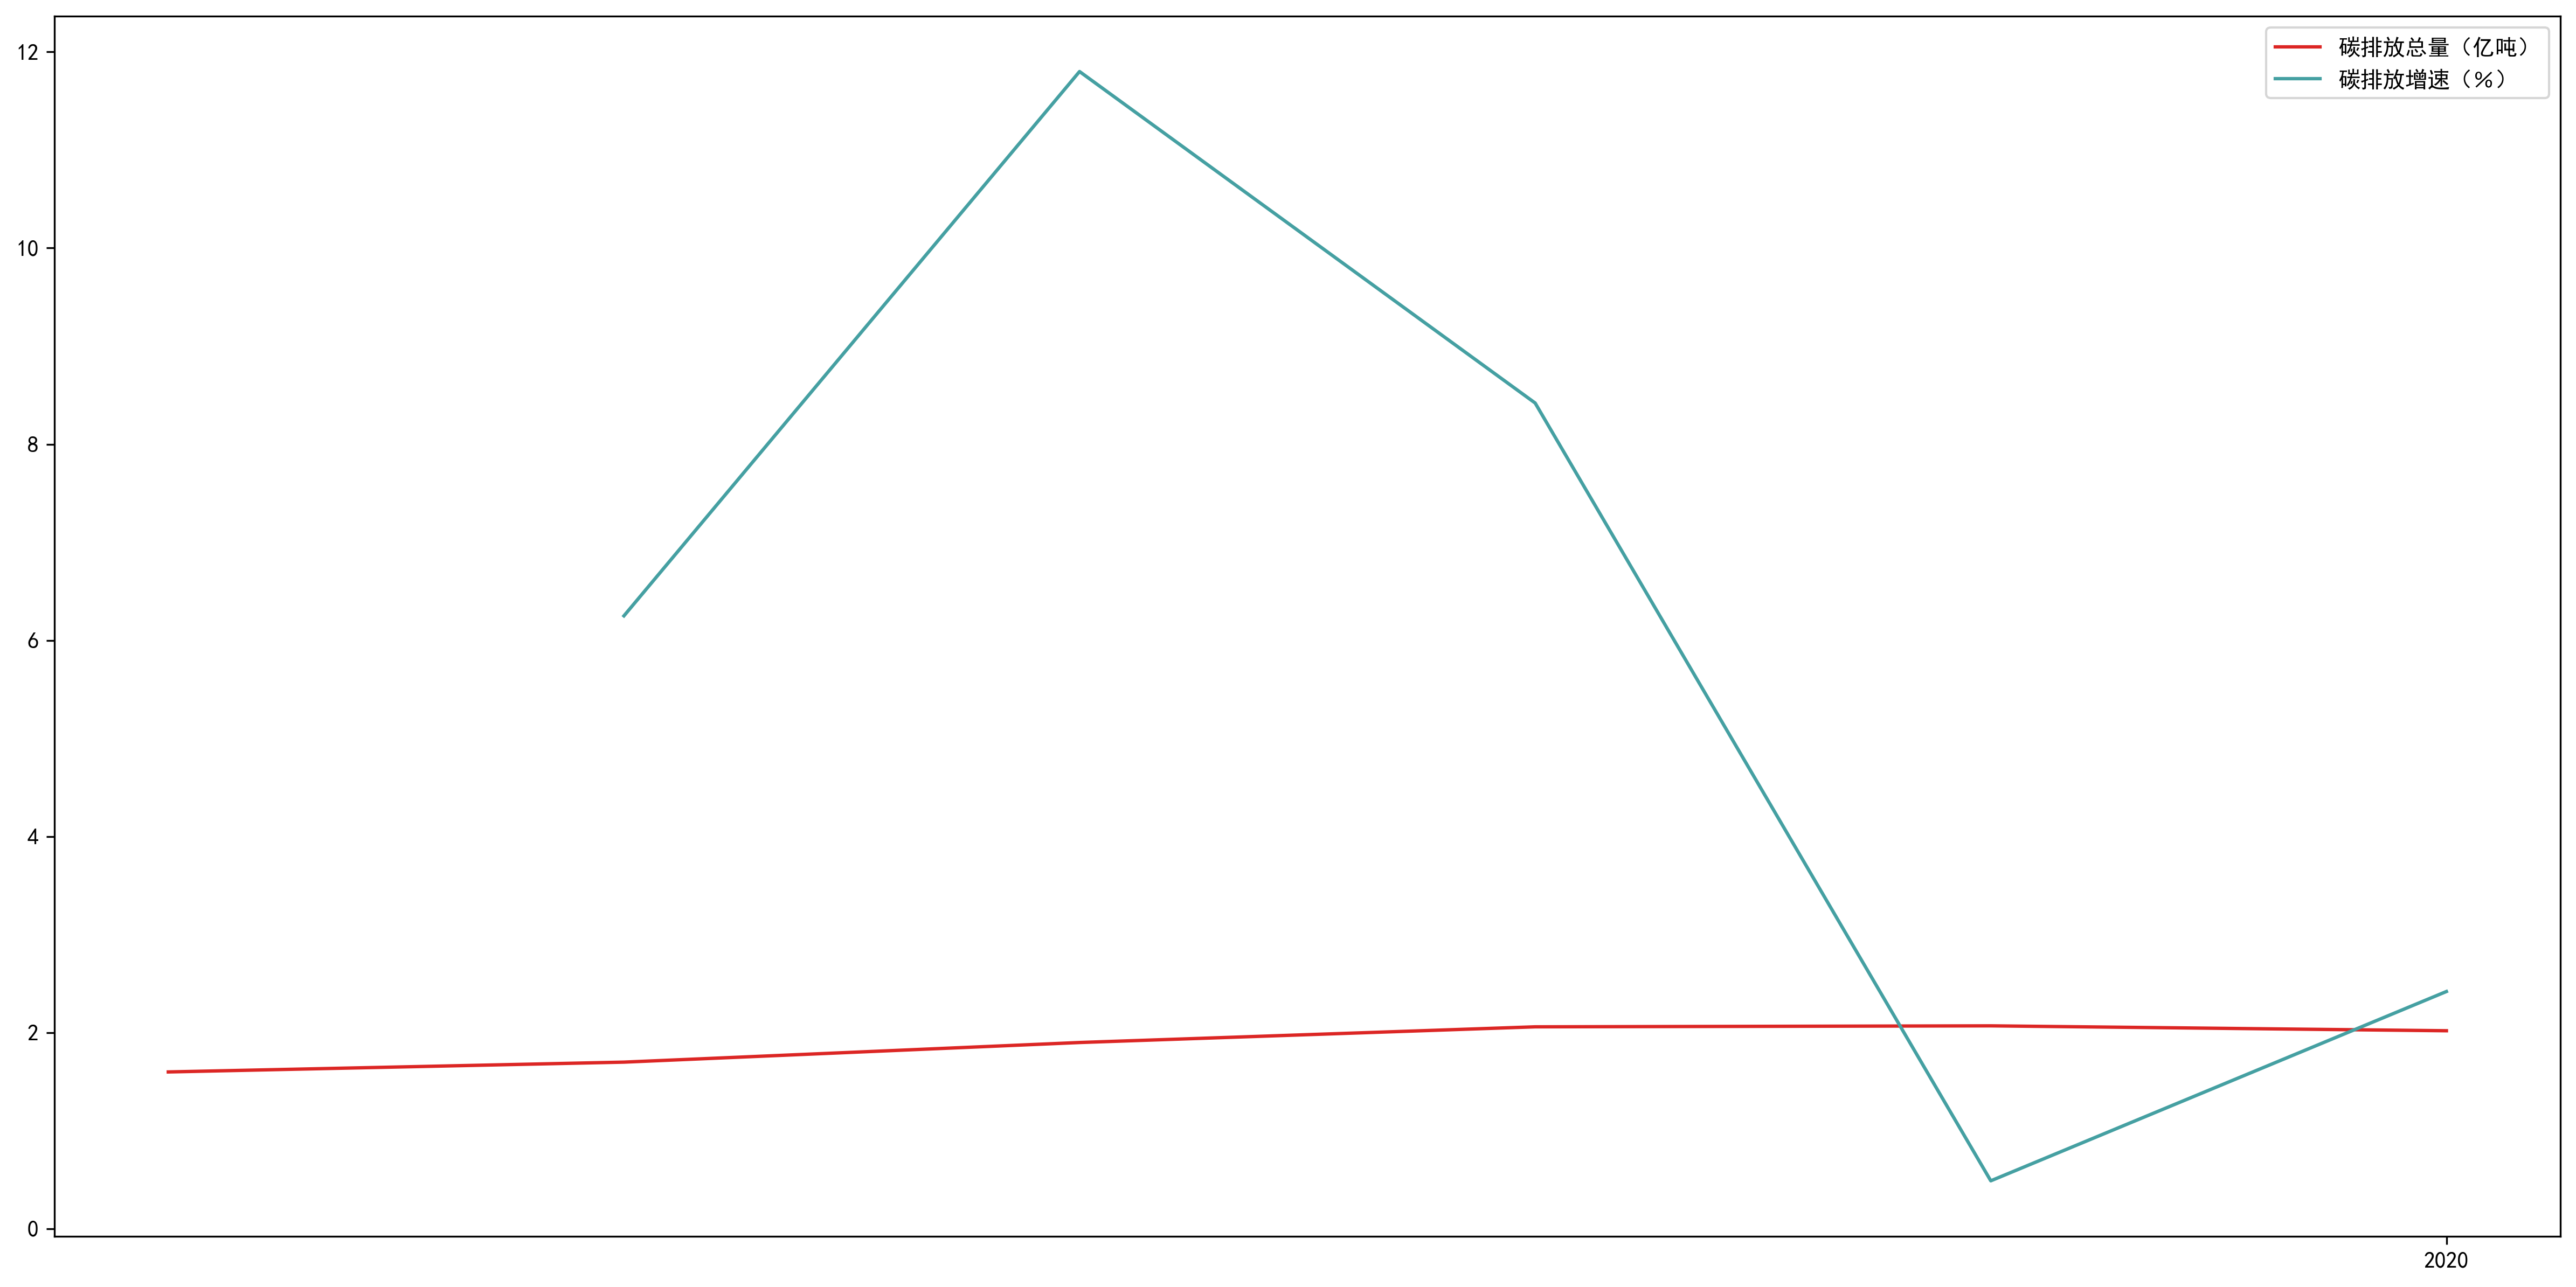

In [9]:
plt.figure(figsize=(20,10), dpi=300)
plt.plot(x,y1,color=r_hex,label='碳排放总量（亿吨）')
plt.plot(x,y2,color=tl_hex,label='碳排放增速（％）')
x_major_locator = MultipleLocator(20)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.legend(loc=0,frameon=True)
plt.show()

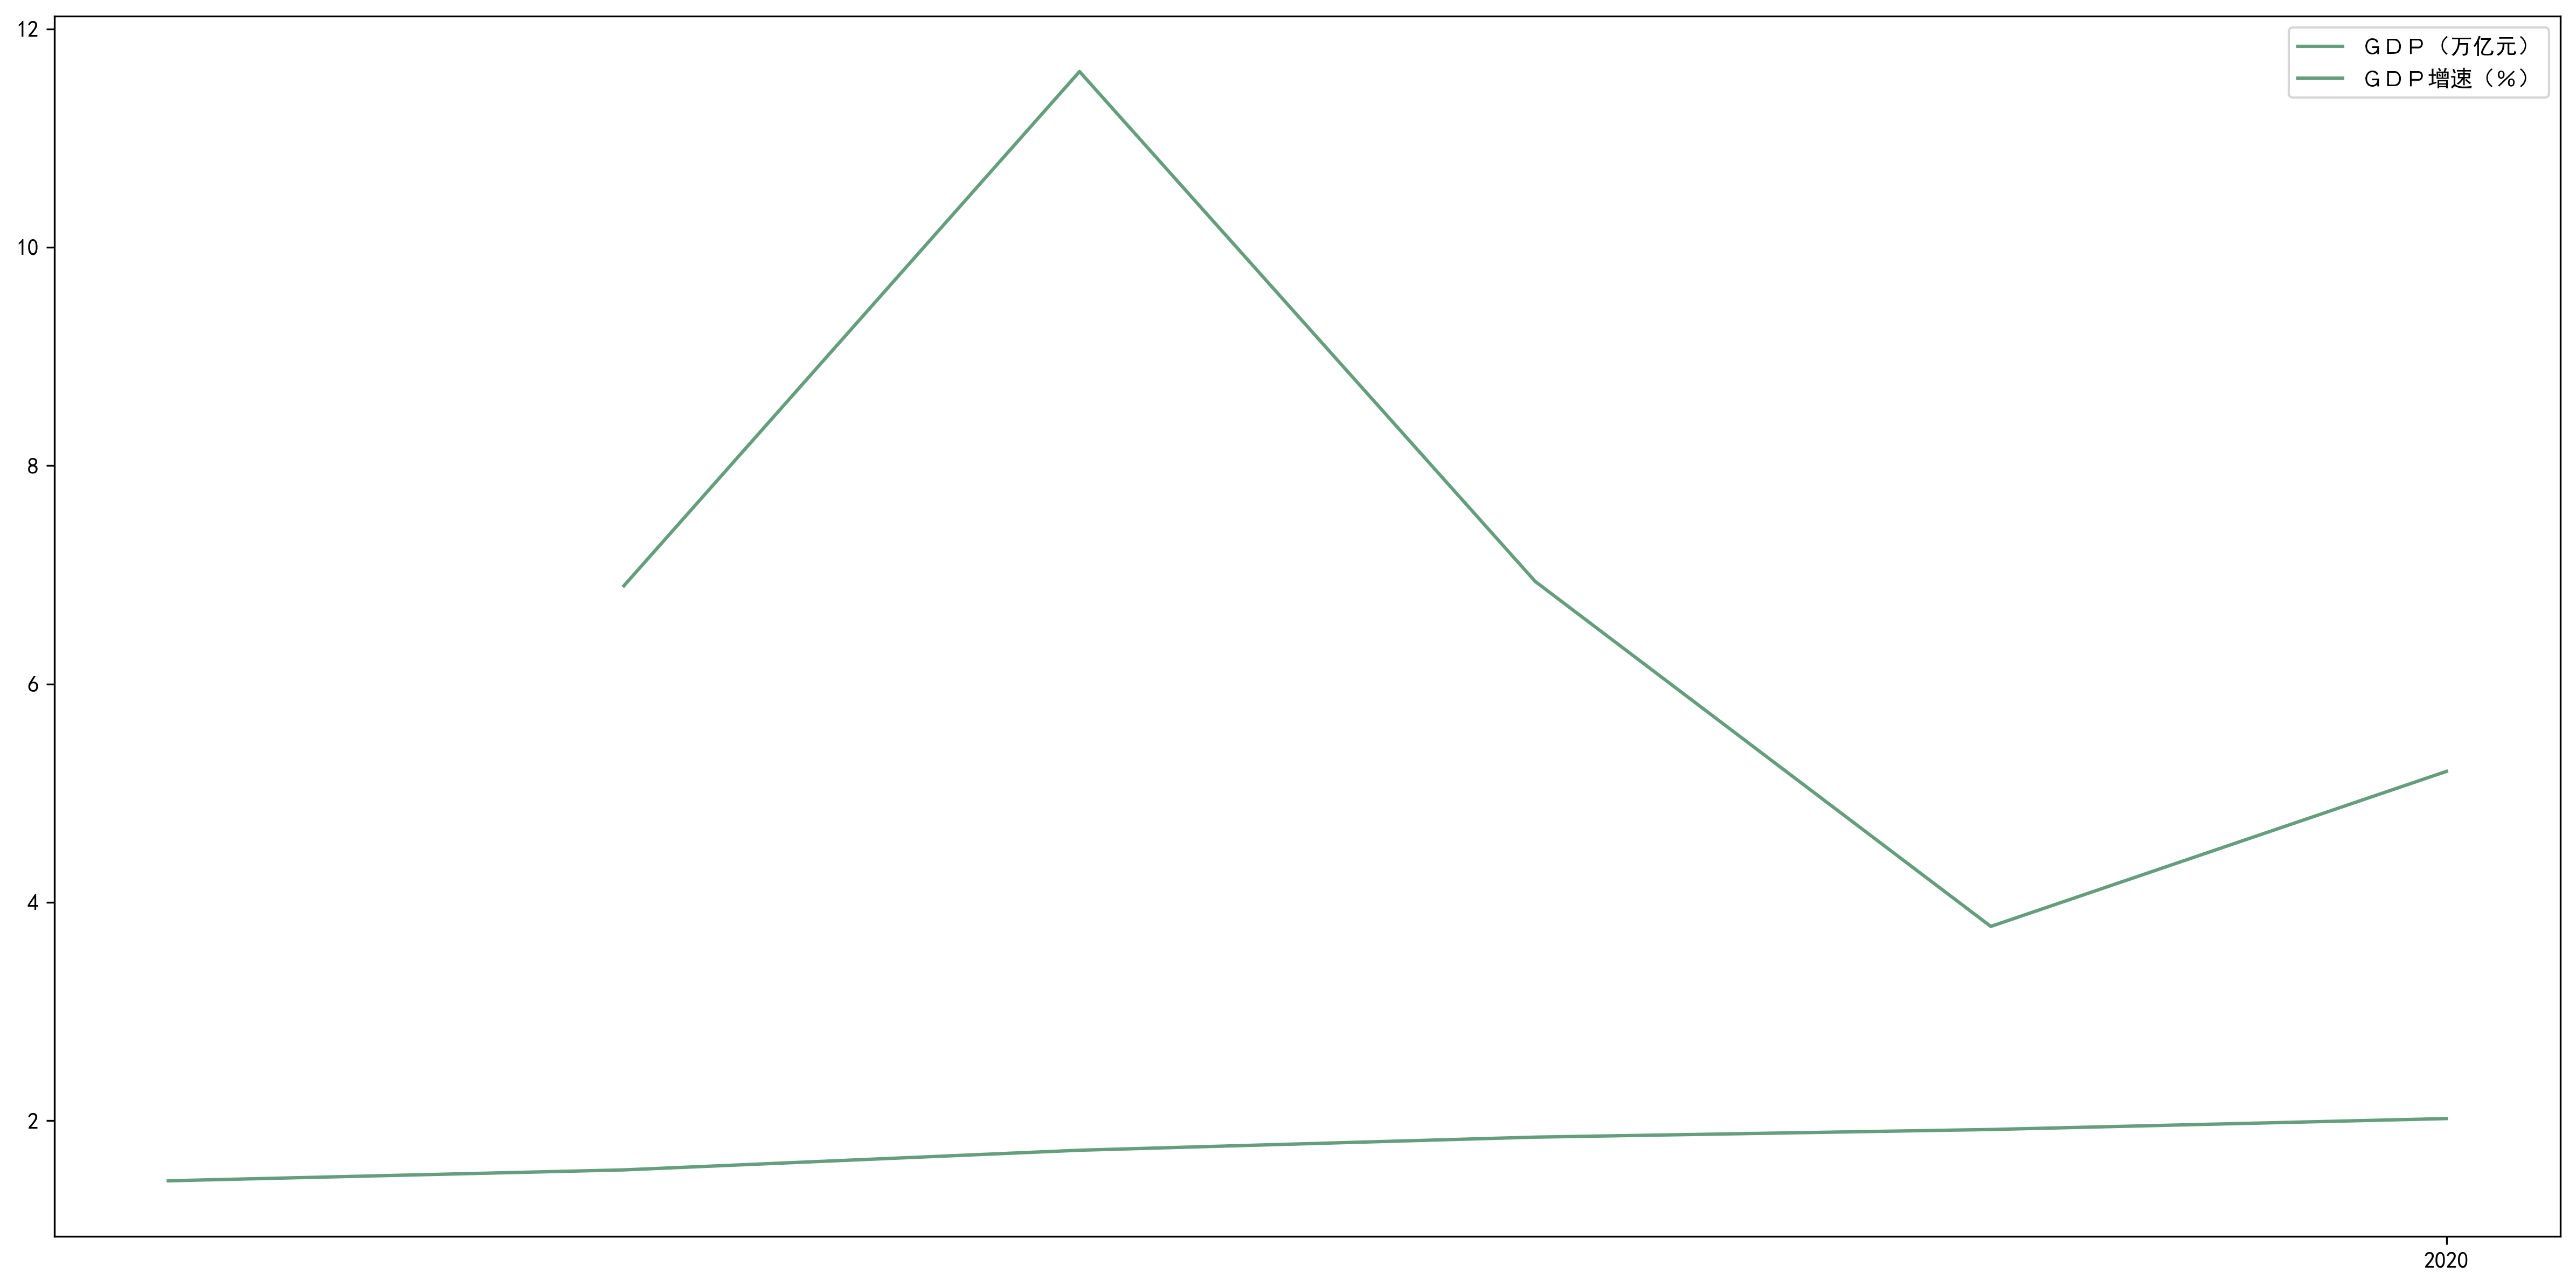

In [10]:
plt.figure(figsize=(20,10), dpi=300)
plt.plot(x,y3,color=g_hex,label='ＧＤＰ（万亿元）')
plt.plot(x,y4,color=g_hex,label='ＧＤＰ增速（％）')
x_major_locator = MultipleLocator(20)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.legend(loc=0,frameon=True)
plt.show()

In [14]:
data2 = pd.read_excel("苏州１２－２０年绿化数据.xlsx")
data2 = data2.set_index("年份")
data2

,绿化覆盖面积（公顷）,绿地面积（公顷）,公园绿地（公顷）
年份,,,
2012,40906,33738,6542
2013,41592,34385,6649
2014,42193,34909,6792
2015,42938,35608,6893
2016,41685,34803,6922
2017,41449,35153,7064
2018,41909,35604,7141
2019,42105,35613,7323
2020,41500,36992,7920


In [19]:
gm = 12.89 * 0.5
qm = 8.06 * 0.5
ct = gm + qm
x = np.array(data2.index)
y = np.array(data2["绿化覆盖面积（公顷）"])*10000*ct

In [26]:
np.int64(y)

array([4284903500, 4356762000, 4419716750, 4497755500, 4366503750,
       4341782750, 4389967750, 4410498750, 4347125000], dtype=int64)

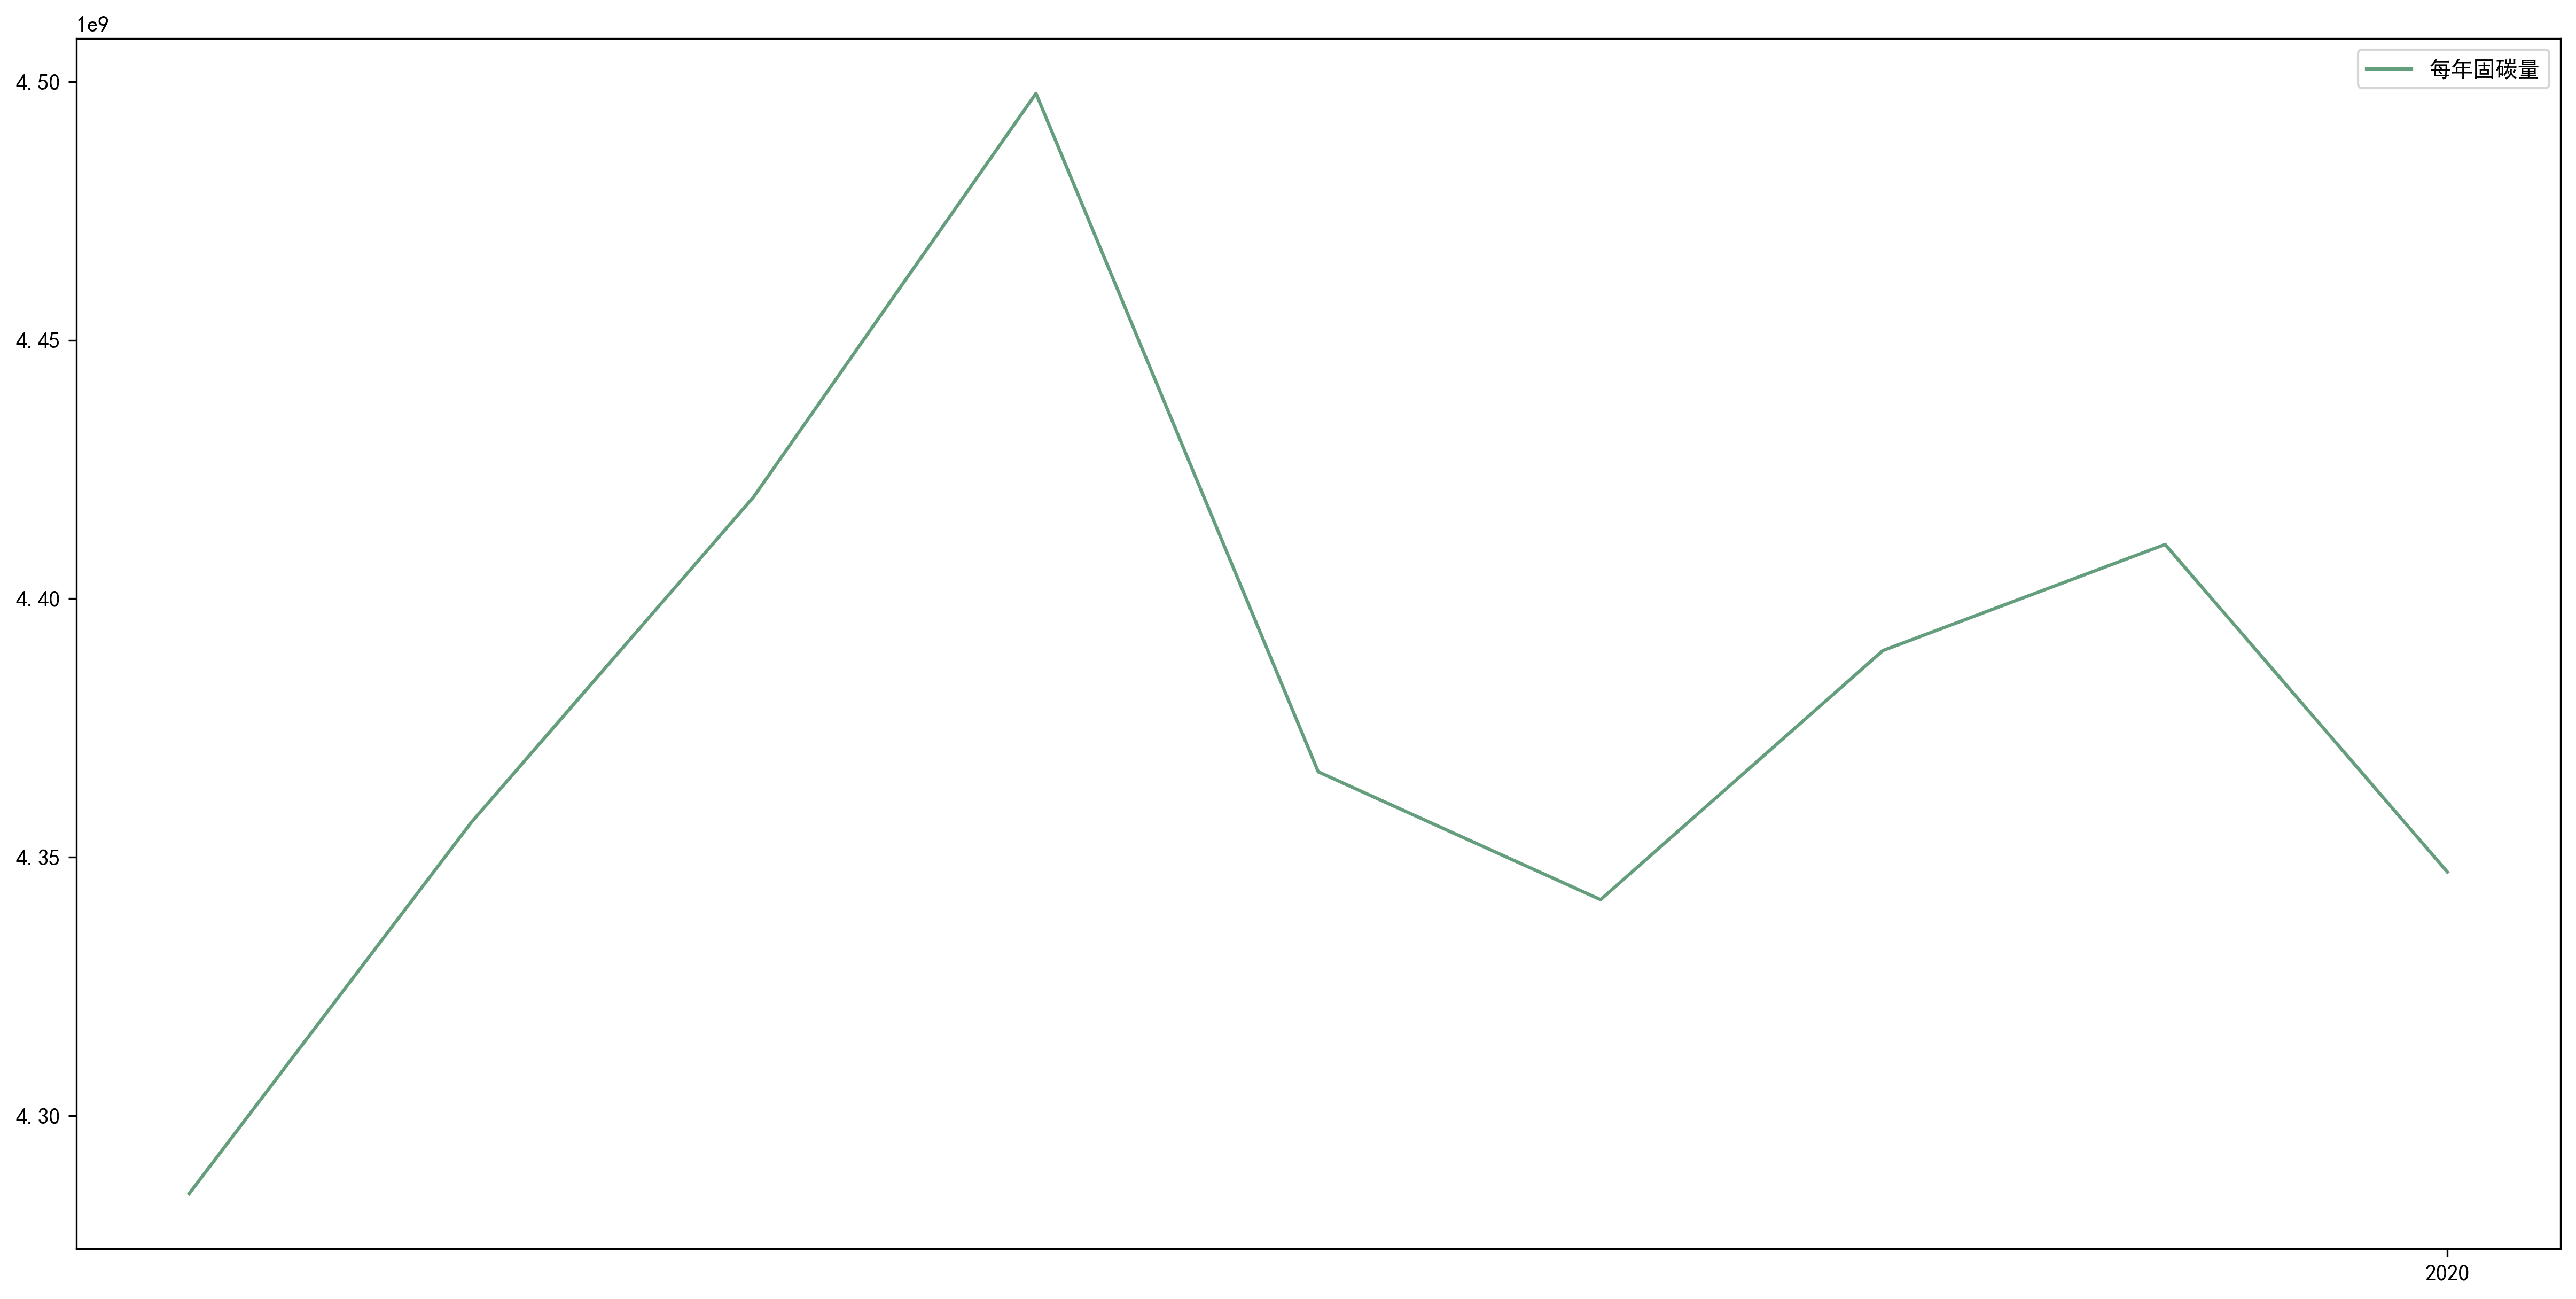

In [20]:
plt.figure(figsize=(20,10), dpi=300)
plt.plot(x,y,color=g_hex,label='每年固碳量')
x_major_locator = MultipleLocator(20)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.legend(loc=0,frameon=True)
plt.show()